<a href="https://colab.research.google.com/github/RisalahNaufal/SPK_ANALISIS-SENTIMENT/blob/main/Analisis_Sentiment_008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.mobile.legends',
    lang='id',  #disini kita mau men scrape data ulasan aplikasi shopee yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # # kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=1000, # disini jumlah ulasan yang mau kita ambil ada seribu
    filter_score_with=None # # kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8336e2fb-3770-4e12-96d9-f06ffe38fd4c,Sun thin Then,https://play-lh.googleusercontent.com/a/ACg8oc...,"Gamenya sih udah bagus bgt, grafiknya mantap, ...",1,4942,1.8.22.8944,2023-10-29 08:10:42,None,NaT,1.8.22.8944
1,1c26d29b-8f2d-4467-a68b-94bf146ed8dd,Abdul Ghani Rossyidi,https://play-lh.googleusercontent.com/a-/ALV-U...,Untuk event2 sdah oke lah. Tapi tolong priorit...,3,16257,1.8.22.8944,2023-10-29 13:25:49,None,NaT,1.8.22.8944
2,b9cfbc11-a773-478a-a30a-d8f471a8fd2e,Kayna Adiva,https://play-lh.googleusercontent.com/a-/ALV-U...,Saya rank legend 5 malah terus bertemu musuh y...,1,19436,1.8.22.8944,2023-10-31 10:01:24,"Dear Hero,\nKami bertekad untuk menciptakan li...",2022-12-15 03:58:25,1.8.22.8944
3,4d0981a2-1896-44f6-9f62-a1fce0344713,Ina Alfiyanah,https://play-lh.googleusercontent.com/a-/ALV-U...,"Setelah di upgrade malah nambah ancur aja, mas...",1,12026,1.8.22.8944,2023-10-22 07:41:54,None,NaT,1.8.22.8944
4,3063a6e4-6cf3-4a2b-b0f8-8b2abcff4440,Riko Novianto,https://play-lh.googleusercontent.com/a/ACg8oc...,Overall game ini udah bagus tetapi yg jadi per...,3,1625,1.8.22.8944,2023-10-27 05:49:47,"Dear Hero,\nMohon maaf atas ketidaknyamananya ...",2023-10-26 06:35:44,1.8.22.8944


In [ ]:
#Run This Code to Sort the Data By Date

new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
111,Muhamad Hardiansyah,3,2023-11-07 12:49:39,Min gimana sih update yang kali ini bukannya m...
650,Natalis Meningan,1,2023-11-04 09:49:45,"Game udah bagus, tapi ada satu hal yang saya l..."
826,Aban Guanteng,1,2023-11-04 09:38:38,Ketemu tim yang sangat berbeda dengan musuh di...
685,Farhan Ramadani,3,2023-11-04 09:07:08,"-Minta tolong dong min, jaringannya diperbaiki..."
661,Hafizh Mangkona,1,2023-11-04 08:38:14,Kepada Developer Game tolong untuk lebih mempe...


In [ ]:
my_df=sorted_df[['content', 'score']]
#karena kita hanya membutuhkan kolom content dan score maka kita lakukan filter kolom lgi hingga menyisakan kolom content dan score.

In [ ]:
print(my_df)

                                               content  score
111  Min gimana sih update yang kali ini bukannya m...      3
650  Game udah bagus, tapi ada satu hal yang saya l...      1
826  Ketemu tim yang sangat berbeda dengan musuh di...      1
685  -Minta tolong dong min, jaringannya diperbaiki...      3
661  Kepada Developer Game tolong untuk lebih mempe...      1
..                                                 ...    ...
479  Halo moonton, saya ada beberapa keluhan nih. Y...      1
986  Untuk match terlalu ekstrim banyak orang ga je...      1
993  Akhir akhir ini setelah update ada beberapa bu...      1
477  Gimana mau maju . Memori yg di gunakan sampe 4...      5
483  Untuk keseluruhan sudah bagus tapi nih masalah...      3

[1000 rows x 2 columns]


In [ ]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 3 :
    return 'Netral'
  elif score > 3 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

<ipython-input-8-674b4ca6ef3f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Label'] = my_df ['score'].apply(pelabelan)


,content,score,Label
111,Min gimana sih update yang kali ini bukannya m...,3,Netral
650,"Game udah bagus, tapi ada satu hal yang saya l...",1,Negatif
826,Ketemu tim yang sangat berbeda dengan musuh di...,1,Negatif
685,"-Minta tolong dong min, jaringannya diperbaiki...",3,Netral
661,Kepada Developer Game tolong untuk lebih mempe...,1,Negatif
269,game yang sangat ramah dan sangat rekomedasi u...,3,Netral
966,Knp ya aku di kasih musuh selalu pro? Pala pun...,3,Netral
651,Dear moonton .. kenapa saya update versi terba...,2,Negatif
909,Ini game cuma ngabisin waktu ajh masa jaringa ...,1,Negatif
833,Saya sangat kecewa dengan game satu ini. Karen...,1,Negatif


In [ ]:
my_df.to_excel("scrapping_data_ML.xlsx", index = False)  #kemudian save menjadi file csv

In [ ]:
!pip install nltk
!pip install sastrawi
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 6.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
import re
import string
import emoji
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt');

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# Load data from Excel file
file_path = 'scrapping_data_ML.xlsx'
my_df = pd.read_excel(file_path)

In [ ]:
# Proses Cleaning

def remove_kata(comment):
  comment = comment.replace('\t', ' ').replace('\n', ' ').replace('\\u', ' ').replace('\\', '')
  comment = comment.encode('ascii', 'replace').decode('ascii')
  comment = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/S+)", " ", comment).split())
  return comment.replace("http://", " ").replace("https://", " ")

my_df['content'] = my_df['content'].apply(remove_kata)


def remove_angka(comment):
    return re.sub(r"\d+", " ", comment)

my_df['content'] = my_df['content'].apply(remove_angka)


def remove_punctuation(comment):
    return comment.translate(str.maketrans("", "", string.punctuation))

my_df['content'] = my_df['content'].apply(remove_punctuation)


def remove_whitespace_LT(comment):
    return comment.strip()

my_df['content'] = my_df['content'].apply(remove_whitespace_LT)


def remove_whitespace_multiple(comment):
    return re.sub('\s+', ' ', comment)

my_df['content'] = my_df['content'].apply(remove_whitespace_multiple)


def remove_single_char(comment):
    return re.sub(r"\b[a-zA-Z]\b", " ", comment)

my_df['content'] = my_df['content'].apply(remove_single_char)


print('Hasil Cleaning: \n')
print(my_df.head(50))

Hasil Cleaning: 

                                              content  score    Label
0   Min gimana sih update yang kali ini bukannya m...      3   Netral
1   Game udah bagus tapi ada satu hal yang saya li...      1  Negatif
2   Ketemu tim yang sangat berbeda dengan musuh di...      1  Negatif
3   Minta tolong dong min jaringannya diperbaikin ...      3   Netral
4   Kepada Developer Game tolong untuk lebih mempe...      1  Negatif
5   game yang sangat ramah dan sangat rekomedasi u...      3   Netral
6   Knp ya aku di kasih musuh selalu pro Pala puny...      3   Netral
7   Dear moonton kenapa saya update versi terbaru ...      2  Negatif
8   Ini game cuma ngabisin waktu ajh masa jaringa ...      1  Negatif
9   Saya sangat kecewa dengan game satu ini Karena...      1  Negatif
10  Kenapa Pas Saya Bermain Di mobile legends Seri...      5  Positif
11  Pebaharuan bukan bener malah sering ngeleg pay...      3   Netral
12  Game apalah ini rank stak legend Mulu ketemu t...      1  Negatif
13

In [ ]:
# Proses Case Folding

import re
import pandas as pd
def casefolding(comment):
    comment = comment.lower()
    comment = comment.strip()
    return comment
my_df['content'] = my_df['content'].apply(casefolding)
print('Hasil Case Folding: \n')
print(my_df.head(50))

Hasil Case Folding: 

                                              content  score    Label
0   min gimana sih update yang kali ini bukannya m...      3   Netral
1   game udah bagus tapi ada satu hal yang saya li...      1  Negatif
2   ketemu tim yang sangat berbeda dengan musuh di...      1  Negatif
3   minta tolong dong min jaringannya diperbaikin ...      3   Netral
4   kepada developer game tolong untuk lebih mempe...      1  Negatif
5   game yang sangat ramah dan sangat rekomedasi u...      3   Netral
6   knp ya aku di kasih musuh selalu pro pala puny...      3   Netral
7   dear moonton kenapa saya update versi terbaru ...      2  Negatif
8   ini game cuma ngabisin waktu ajh masa jaringa ...      1  Negatif
9   saya sangat kecewa dengan game satu ini karena...      1  Negatif
10  kenapa pas saya bermain di mobile legends seri...      5  Positif
11  pebaharuan bukan bener malah sering ngeleg pay...      3   Netral
12  game apalah ini rank stak legend mulu ketemu t...      1  Negati

In [ ]:
my_df.to_excel('cleaning.xlsx', index=False)

data_fold = pd.read_excel('cleaning.xlsx')
print(data_fold.shape)
print(data_fold.head())

(1000, 3)
                                             content  score    Label
0  min gimana sih update yang kali ini bukannya m...      3   Netral
1  game udah bagus tapi ada satu hal yang saya li...      1  Negatif
2  ketemu tim yang sangat berbeda dengan musuh di...      1  Negatif
3  minta tolong dong min jaringannya diperbaikin ...      3   Netral
4  kepada developer game tolong untuk lebih mempe...      1  Negatif


In [ ]:
import string
import re

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
# Proses Tokenizing

import nltk
nltk.download('punkt')

def word_tokenize_wrapper(comment):
  return word_tokenize(comment)

my_df['content'] = my_df['content'].apply(word_tokenize_wrapper)

print('Hasil Tokenizing: \n')
print(my_df.head(20))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Hasil Tokenizing: 

                                              content  score    Label
0   [min, gimana, sih, update, yang, kali, ini, bu...      3   Netral
1   [game, udah, bagus, tapi, ada, satu, hal, yang...      1  Negatif
2   [ketemu, tim, yang, sangat, berbeda, dengan, m...      1  Negatif
3   [minta, tolong, dong, min, jaringannya, diperb...      3   Netral
4   [kepada, developer, game, tolong, untuk, lebih...      1  Negatif
5   [game, yang, sangat, ramah, dan, sangat, rekom...      3   Netral
6   [knp, ya, aku, di, kasih, musuh, selalu, pro, ...      3   Netral
7   [dear, moonton, kenapa, saya, update, versi, t...      2  Negatif
8   [ini, game, cuma, ngabisin, waktu, ajh, masa, ...      1  Negatif
9   [saya, sangat, kecewa, dengan, game, satu, ini...      1  Negatif
10  [kenapa, pas, saya, bermain, di, mobile, legen...      5  Positif
11  [pebaharuan, bukan, bener, malah, sering, ngel...      3   Netral
12  [game, apalah, ini, rank, stak, legend, mulu, ...      1  Negatif


In [ ]:
my_df.to_excel('tokenizing.xlsx', index=False)


data_token = pd.read_excel("tokenizing.xlsx")
print(data_token.shape)
print(data_token.head())

(1000, 3)
                                             content  score    Label
0  ['min', 'gimana', 'sih', 'update', 'yang', 'ka...      3   Netral
1  ['game', 'udah', 'bagus', 'tapi', 'ada', 'satu...      1  Negatif
2  ['ketemu', 'tim', 'yang', 'sangat', 'berbeda',...      1  Negatif
3  ['minta', 'tolong', 'dong', 'min', 'jaringanny...      3   Netral
4  ['kepada', 'developer', 'game', 'tolong', 'unt...      1  Negatif


In [ ]:
# Proses Filtering/Stopword Removal

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'anj', 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'jgn', 'ga', 'ok', 'bgt', 'banget', 'jg',
                       'gw','guys','gtu','fyi',
                       'iya','aja','sih','iyaa','tpi','udh','ga','ngga','nggak'
                       ,'yeeha','itu','ituu','tpi','giniii','kaan','pas',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nyesel', 'habis','download','iyaah',
                       'nanya','yaa','tcodtaf','ccq','google','yo','gada','gue','udah','blm','cakep','beneran','dah',
                       'sender','baru','lagi','maen','tbtb','woy','lagi','lg','lgi','njir','kocak','wkwk','naseh','nan',
                       'tcok','cok','nntn','sengaja','bru',
                        ])

list_stopwords = set(list_stopwords)

def stopword_removal(comment):
    return [word for word in comment if word not in list_stopwords]

my_df['content'] = my_df['content'].apply(stopword_removal)
print('Hasil Filtering: \n')
print(my_df.head(30))

Hasil Filtering: 

                                              content  score    Label
0   [min, gimana, update, kali, bagus, rusak, logi...      3   Netral
1   [game, bagus, lihat, player, mobile, legends, ...      1  Negatif
2   [ketemu, tim, berbeda, musuh, ranked, tim, amp...      1  Negatif
3   [tolong, min, jaringannya, diperbaikin, jaring...      3   Netral
4   [developer, game, tolong, memperhatikan, kesei...      1  Negatif
5   [game, ramah, rekomedasi, bermain, saidara, or...      3   Netral
6   [knp, kasih, musuh, pro, pala, kawan, noob, an...      3   Netral
7   [dear, moonton, update, versi, terbaru, merugi...      2  Negatif
8   [game, ngabisin, ajh, jaringa, bagus, dikasi, ...      1  Negatif
9   [kecewa, game, developer, gamenya, bodoh, meru...      1  Negatif
10  [bermain, mobile, legends, temen, moonton, tol...      5  Positif
11  [pebaharuan, bener, ngeleg, payah, tolong, per...      3   Netral
12  [game, apalah, rank, stak, legend, mulu, ketem...      1  Negatif
1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
my_df.to_excel('stopword.xlsx', index=False)

data_filter = pd.read_excel("stopword.xlsx")
print(data_filter.shape)
print(data_filter.head())

(1000, 3)
                                             content  score    Label
0  ['min', 'gimana', 'update', 'kali', 'bagus', '...      3   Netral
1  ['game', 'bagus', 'lihat', 'player', 'mobile',...      1  Negatif
2  ['ketemu', 'tim', 'berbeda', 'musuh', 'ranked'...      1  Negatif
3  ['tolong', 'min', 'jaringannya', 'diperbaikin'...      3   Netral
4  ['developer', 'game', 'tolong', 'memperhatikan...      1  Negatif


In [ ]:
# Proses Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(document):
    return [stemmer.stem(term) for term in document]

my_df['content'] = my_df['content'].apply(stemming)
print(my_df['content'].head())

0    [min, gimana, update, kali, bagus, rusak, logi...
1    [game, bagus, lihat, player, mobile, legends, ...
2    [ketemu, tim, beda, musuh, ranked, tim, ampas,...
3    [tolong, min, jaring, diperbaikin, jaring, rom...
4    [developer, game, tolong, perhati, imbang, mat...
Name: content, dtype: object


In [ ]:
my_df.to_excel('final.xlsx', index=False)

datafinal = pd.read_excel("final.xlsx")
print(datafinal.shape)
print(datafinal.head())

(1000, 3)
                                             content  score    Label
0  ['min', 'gimana', 'update', 'kali', 'bagus', '...      3   Netral
1  ['game', 'bagus', 'lihat', 'player', 'mobile',...      1  Negatif
2  ['ketemu', 'tim', 'beda', 'musuh', 'ranked', '...      1  Negatif
3  ['tolong', 'min', 'jaring', 'diperbaikin', 'ja...      3   Netral
4  ['developer', 'game', 'tolong', 'perhati', 'im...      1  Negatif


In [ ]:
# Proses TF-IDF

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

datafinal = pd.read_excel("final.xlsx")
datafinal = datafinal.astype({'Label': 'category', 'content': 'string', 'score': 'int'})

tf = TfidfVectorizer()

text_tf = tf.fit_transform(datafinal['content'].astype('U'))

result = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names_out()).join(datafinal['Label'])

print(result)

     aamiin  aamon  aba  abadi  abai  abis  abyss  acara  accountsudah  \
0       0.0    0.0  0.0    0.0   0.0   0.0    0.0    0.0           0.0   
1       0.0    0.0  0.0    0.0   0.0   0.0    0.0    0.0           0.0   
2       0.0    0.0  0.0    0.0   0.0   0.0    0.0    0.0           0.0   
3       0.0    0.0  0.0    0.0   0.0   0.0    0.0    0.0           0.0   
4       0.0    0.0  0.0    0.0   0.0   0.0    0.0    0.0           0.0   
..      ...    ...  ...    ...   ...   ...    ...    ...           ...   
995     0.0    0.0  0.0    0.0   0.0   0.0    0.0    0.0           0.0   
996     0.0    0.0  0.0    0.0   0.0   0.0    0.0    0.0           0.0   
997     0.0    0.0  0.0    0.0   0.0   0.0    0.0    0.0           0.0   
998     0.0    0.0  0.0    0.0   0.0   0.0    0.0    0.0           0.0   
999     0.0    0.0  0.0    0.0   0.0   0.0    0.0    0.0           0.0   

     achievement  ...  youll  youre  youtube  youtubeigdll   yt  yth  yutuban  \
0            0.0  ...    0.0  

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Membaca data dari file Excel
datafinal = pd.read_excel("final.xlsx")

# Memisahkan fitur dan label
X = datafinal['content']
y = datafinal['Label']

# Pembagian data 70:30 untuk pembelajaran dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Algoritma Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

# Algoritma Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
y_pred_rf = rf.predict(X_test_vec)

# Mengukur kinerja Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Mengukur kinerja Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Menampilkan hasil kinerja Naive Bayes
print("Naive Bayes:")
print("Akurasi (80:20):", accuracy_nb)
print("Presisi (80:20):", precision_nb)
print("Recall (80:20):", recall_nb)
print("F1 Score (80:20):", f1_nb)

# Menampilkan hasil kinerja Random Forest
print("\nRandom Forest:")
print("Akurasi (80:20):", accuracy_rf)
print("Presisi (80:20):", precision_rf)
print("Recall (80:20):", recall_rf)
print("F1 Score (80:20):", f1_rf)


Naive Bayes:
Akurasi (80:20): 0.675
Presisi (80:20): 0.6493523949169109
Recall (80:20): 0.675
F1 Score (80:20): 0.5909398587465996

Random Forest:
Akurasi (80:20): 0.69
Presisi (80:20): 0.7895854922279792
Recall (80:20): 0.69
F1 Score (80:20): 0.5918978332073569


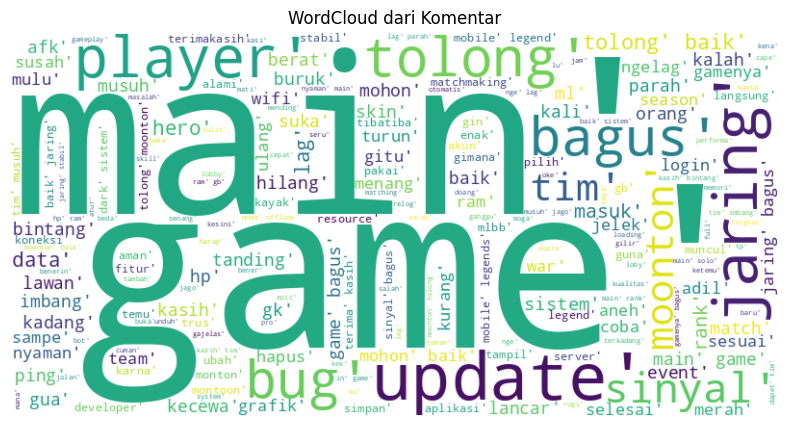

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# Proses TF-IDF
datafinal = pd.read_excel("final.xlsx")
datafinal = datafinal.astype({'Label': 'category', 'content': 'string', 'score': 'int'})

tf = TfidfVectorizer()
text_tf = tf.fit_transform(datafinal['content'].astype('U'))
result = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names_out()).join(datafinal['Label'])

# Visualisasi WordCloud
text = ' '.join(datafinal['content'])

# Menggunakan daftar stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))

# Menghapus stop words dari teks
filtered_text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Tampilkan word cloud dengan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Komentar')
plt.show()


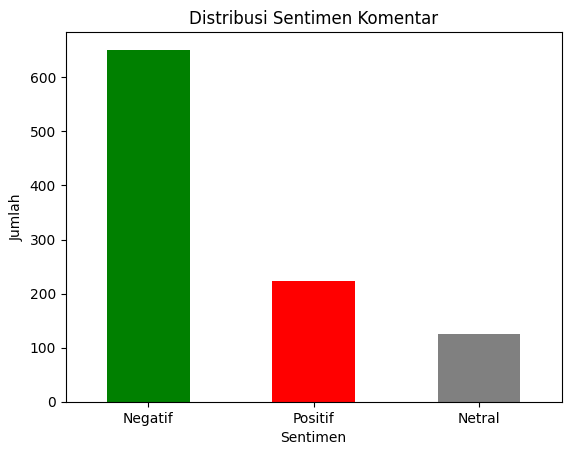

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Proses TF-IDF
datafinal = pd.read_excel("final.xlsx")
datafinal = datafinal.astype({'Label': 'category', 'content': 'string', 'score': 'int'})

# Visualisasi Distribusi Sentimen
sentiment_distribution = datafinal['Label'].value_counts()
sentiment_distribution.plot(kind='bar', rot=0, color=['green', 'red', 'grey'])
plt.title('Distribusi Sentimen Komentar')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()


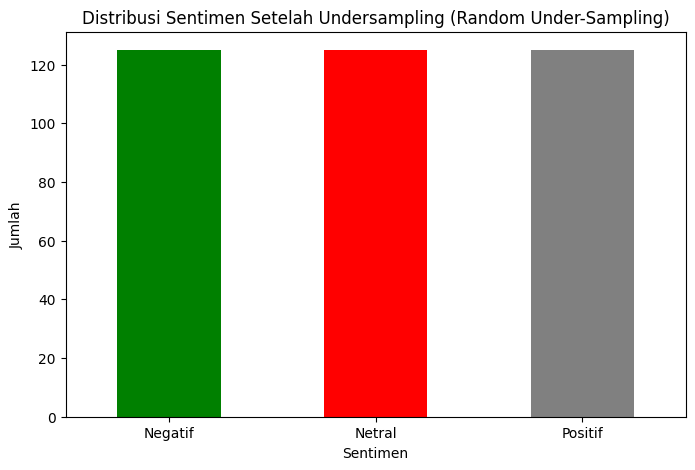

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Melakukan undersampling pada data
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(datafinal[['content', 'score']], datafinal['Label'])

# Visualisasi Distribusi Sentimen Setelah Undersampling
plt.figure(figsize=(8, 5))
y_resampled.value_counts().plot(kind='bar', rot=0, color=['green', 'red', 'grey'])
plt.title('Distribusi Sentimen Setelah Undersampling (Random Under-Sampling)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()
